![alt text](Task.JPG "Задание")

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

def window_henning(x):
    result = np.zeros_like(x)
    N = x.shape[0]
    for i in range(N):
        result[i] = 0.5 * x[i] * (1 - np.cos((2 * np.pi * i) / (N - 1)))
    return result

def plotFFT(f, t):
    data = [f, window_henning(f)]
    titles = ["Прямоугольное окно", "Окно Ханна", "Сравнение"]    
    fft_data = np.abs(fft.fft(data))
    timestep = t[1] - t[0]
    freq = fft.fftfreq(t.size, d=timestep) * np.pi * 2
    mask = freq > 0
    freq = freq[mask]
    for i, res in enumerate(fft_data):
        plt.figure(dpi=80, figsize=(18, 6))
        res = res[mask]
        plt.title(titles[i])
        plt.plot(freq, res, "-s")
        plt.xlabel("w")
        plt.ylabel("abs")
        
    plt.figure(dpi=80, figsize=(18, 6))
    res_0 = fft_data[0][mask]
    res_1 = fft_data[1][mask]
    plt.title(titles[2])
    plt.plot(freq, res_0, "-s", label = "Прямоугольный")
    plt.plot(freq, res_1, "-s", label = "Ханн")
    plt.legend()
    plt.xlabel("w")
    plt.ylabel("abs")

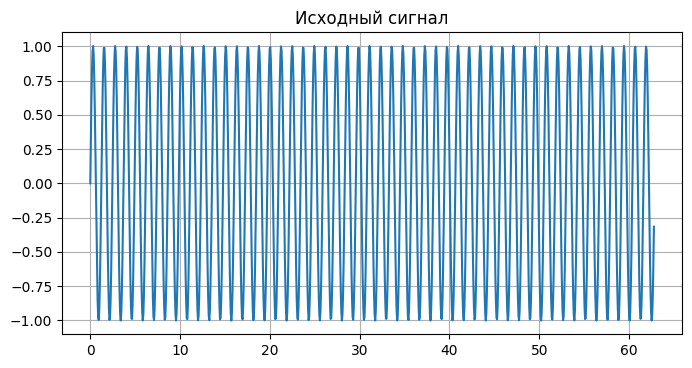

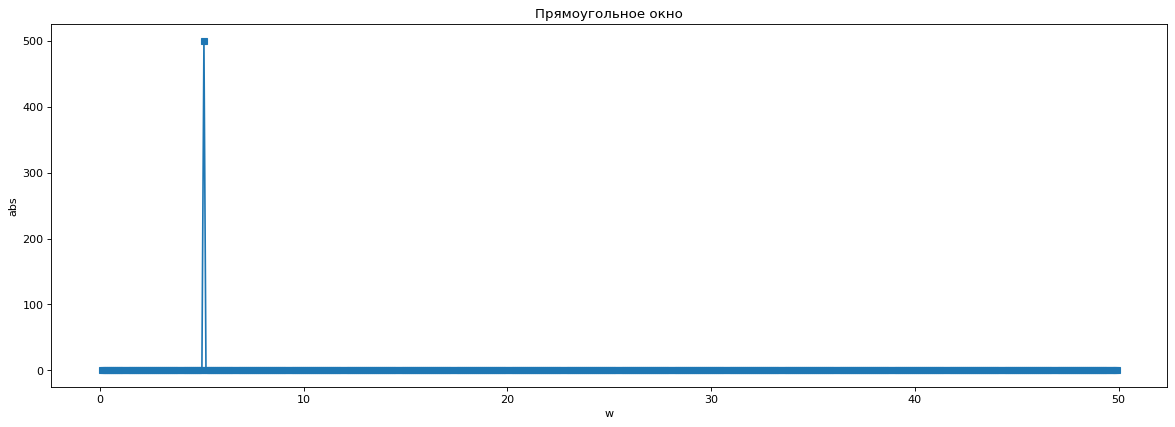

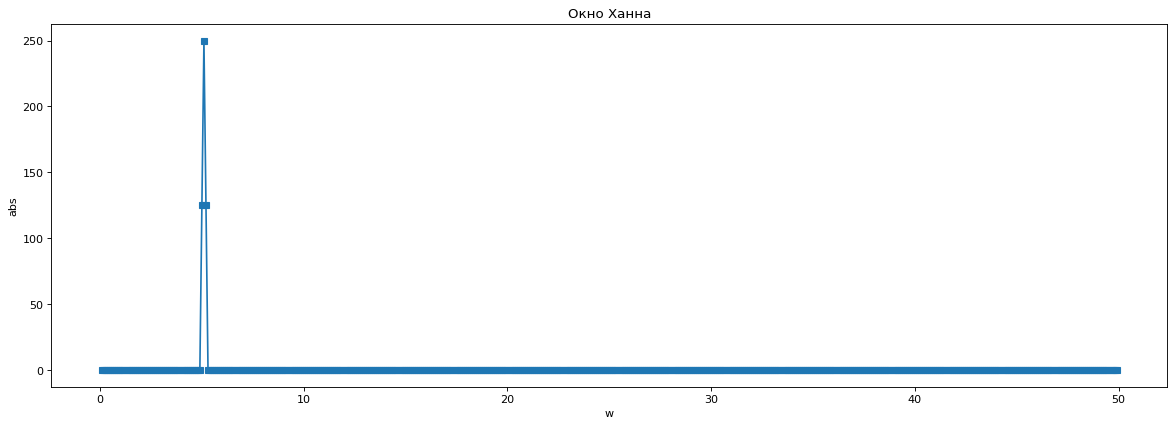

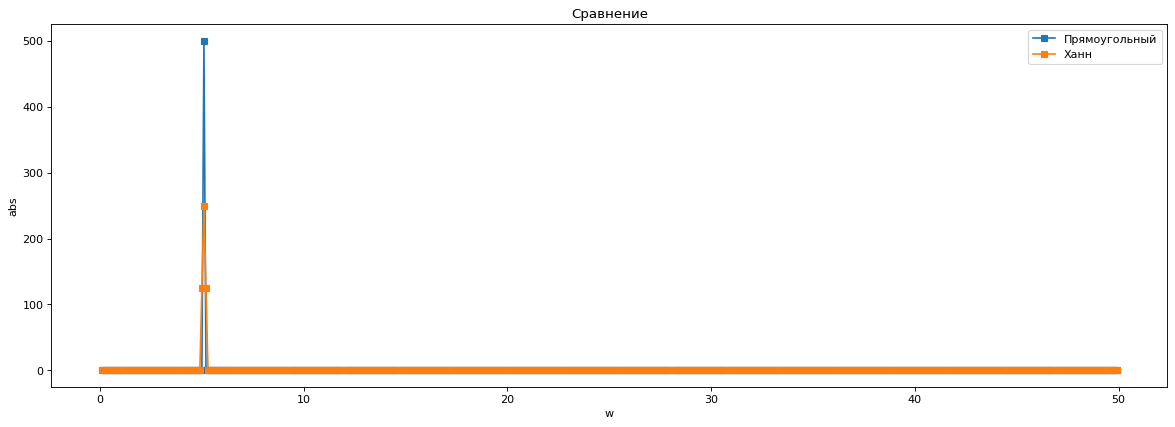

In [31]:
dt = np.pi/ 50
start = 0.0
width = 2 * np.pi * 10
t = np.arange(start, start + width, dt)
f = np.sin(5.1 * t) + 0.002 * np.sin(25.5 * t)
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(t, f)
plt.title("Исходный сигнал")
plt.grid()

plotFFT(f, t)